In [100]:
from PIL import Image
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
def show_text(image_path):
    img = Image.open(image_path)
    extracted_text = pytesseract.image_to_string(img)
    return extracted_text

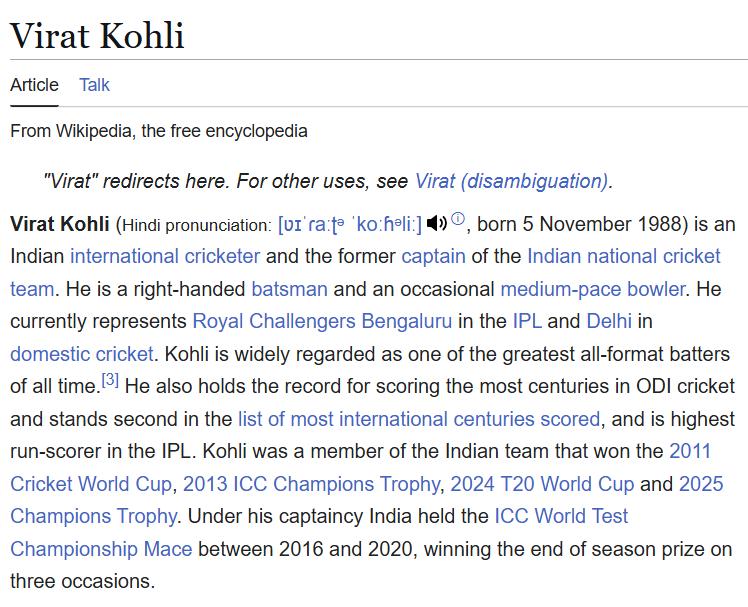

In [4]:
img = Image.open('images/i2.png')
img

In [5]:
text = show_text('images/i2.png')

In [6]:
text

'Virat Kohli\n\nArticle Talk\n\nFrom Wikipedia, the free encyclopedia\n\n"Virat" redirects here. For other uses, see Virat (disambiguation).\n\nVirat Kohli (Hindi pronunciation: [ot\'ra:{? \'ko:heli:] 4), born 5 November 1988) is an\nIndian international cricketer and the former captain of the Indian national cricket\nteam. He is a right-handed batsman and an occasional medium-pace bowler. He\ncurrently represents Royal Challengers Bengaluru in the IPL and Delhi in\ndomestic cricket. Kohli is widely regarded as one of the greatest all-format batters\nof all time.) He also holds the record for scoring the most centuries in ODI cricket\nand stands second in the list of most international centuries scored, and is highest\nrun-scorer in the IPL. Kohli was a member of the Indian team that won the 2011\nCricket World Cup, 2013 ICC Champions Trophy, 2024 T20 World Cup and 2025\nChampions Trophy. Under his captaincy India held the ICC World Test\nChampionship Mace between 2016 and 2020, winnin

## TEXT_CLEANING

In [7]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
text = show_text('images/i2.png')
doc = nlp(text)

In [10]:
tokens = []
for token in doc:
    if token.is_alpha or token.is_digit or token.is_punct:
        tokens.append(token.text)


print(" ".join(tokens))

Virat Kohli Article Talk From Wikipedia , the free encyclopedia " Virat " redirects here . For other uses , see Virat ( disambiguation ) . Virat Kohli ( Hindi pronunciation : [ : { ? ' ko : heli :] 4 ) , born 5 November 1988 ) is an Indian international cricketer and the former captain of the Indian national cricket team . He is a right - handed batsman and an occasional medium - pace bowler . He currently represents Royal Challengers Bengaluru in the IPL and Delhi in domestic cricket . Kohli is widely regarded as one of the greatest all - format batters of all time . ) He also holds the record for scoring the most centuries in ODI cricket and stands second in the list of most international centuries scored , and is highest run - scorer in the IPL . Kohli was a member of the Indian team that won the 2011 Cricket World Cup , 2013 ICC Champions Trophy , 2024 World Cup and 2025 Champions Trophy . Under his captaincy India held the ICC World Test Championship Mace between 2016 and 2020 , w

## summarization of text

In [11]:
from transformers import pipeline

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


In [13]:
res = sentiment_analyzer(text)
res

[{'label': 'POSITIVE', 'score': 0.9992561936378479}]

## GEN-AI Integration

In [168]:
import os
from langchain.chat_models import init_chat_model

os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'api_key'

In [97]:
from langchain.tools import tool

## binding tools, memory to model makes it an agent

In [119]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain.tools import tool

In [120]:
wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())  ## actual tool


In [169]:
from langchain_huggingface import ChatHuggingFace , HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-R1-0528",
    task = 'text_generation',
    provider = 'auto'
)

In [170]:
from langgraph.checkpoint.memory import InMemorySaver
chat_model = ChatHuggingFace(llm=llm)
from langchain.agents import create_agent
agent = create_agent(chat_model,[wiki],checkpointer = InMemorySaver())

In [171]:
model2_with_tools = chat_model.bind_tools([wiki])

In [172]:
response = chat_model.invoke('who is virat kohli?')

In [173]:
print(response.content)

<think>
Okay, the user is asking, "Who is Virat Kohli?" Hmm, seems like a straightforward question, but I should consider why they're asking. Maybe they're new to cricket, heard the name, and want a quick overview. Or perhaps they're familiar but need specific details. 

First, I need to cover the basics: who he is, his role, and why he's famous. But since he's such a big figure, I shouldn't overwhelm with too much info at once. Let me structure it simply—start with his identity (Indian cricketer), then key achievements, and end with his broader impact. 

I notice the user didn't specify depth. Are they a student doing research? A casual fan? Since it's a general question, I'll keep it concise but highlight iconic stats (like 50 ODI centuries) and his captaincy era. Also, mention his current status (still active) so they know he's relevant today. 

Wait—should I add a fun fact? Like his nickname "King Kohli"? Nah, unless asked. Stick to substance. Oh, but his aggression and fitness rev

In [70]:
import re

### keywords

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_keywords(text, top_n=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    scores = zip(vectorizer.get_feature_names_out(), X.toarray()[0])
    sorted_words = sorted(scores, key=lambda x: x[1], reverse=True)
    return [w for w, s in sorted_words[:top_n]]

In [108]:
arr = get_keywords(response.content)
for elmnt in arr:
    print(elmnt)

cricket
test
icc
indian
000


In [117]:
qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling b

# Model

In [179]:
  

class TextProcessor:
    def __init__(self, image_path):
        self.img_path = image_path
        self.text = self.show_text()

    def show_text(self):
        img = Image.open(self.img_path)
        raw_text = pytesseract.image_to_string(img)

        cleaned_text = re.sub(r'\s+', ' ', raw_text)       
        cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)  
        cleaned_text = cleaned_text.strip()                
        return cleaned_text

    def analyze_sentiment(self):
        return sentiment_analyzer(self.text)

    def get_tokens(self):
        doc = nlp(self.text)
        return [token.text for token in doc if token.is_alpha or token.is_digit or token.is_punct]

    def get_entities(self):
        doc = nlp(self.text)
        return [(ent.text, ent.label_) for ent in doc.ents]

    def summarize_text(self):
        if len(self.text.split()) < 50:
            return "Text too short to summarize."
        summary = summarizer(self.text, max_length=100, min_length=30, do_sample=False)
        return summary[0]['summary_text']

    def get_keywords(self, top_n=5):
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform([self.text])
        scores = zip(vectorizer.get_feature_names_out(), X.toarray()[0])
        sorted_words = sorted(scores, key=lambda x: x[1], reverse=True)
        return [w for w, s in sorted_words[:top_n]]


    def ask_question(self):
        response = chat_model.invoke(self.text)
        return response.content

    def ask_questions_about_text(self, user_question):
        if len(self.text.strip()) == 0:
            return "No text found in the image."
        answer = qa_model(question=user_question, context=self.text)
        return answer['answer']

    def ask_questions_about_text_n(self, user_question):
        if len(self.text.strip()) == 0:
            return "No text found in the image."
        input_ = agent.invoke(
                   {"messages": [{"role": "user", "content": self.text}]},
                   {"configurable": {"thread_id": "1"}},
                             )
        output_ = agent.invoke(
                  {"messages":[{'role':'user','content':user_question}]},
                  {"configurable":{'thread_id':'1'}},  ## read below it remebers all previous conversations
                               )
        if isinstance(output_, dict) and "messages" in output_:
            raw_text = output_["messages"][-1].content
        elif hasattr(output_, "content"):  # for direct AIMessage
            raw_text = output_.content
        else:
            raw_text = str(output_)
        
        cleaned_text = re.sub(r"<think>.*?</think>", "", raw_text, flags=re.DOTALL).strip()
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)
        cleaned_text = cleaned_text.strip()
        return cleaned_text
        

In [72]:
t = TextProcessor('images/i2.png')

In [73]:
t.analyze_sentiment()

[{'label': 'POSITIVE', 'score': 0.9992561936378479}]

In [74]:
t.show_text()

'Virat Kohli Article Talk From Wikipedia, the free encyclopedia "Virat" redirects here. For other uses, see Virat (disambiguation). Virat Kohli (Hindi pronunciation: [ot\'ra:{? \'ko:heli:] 4), born 5 November 1988) is an Indian international cricketer and the former captain of the Indian national cricket team. He is a right-handed batsman and an occasional medium-pace bowler. He currently represents Royal Challengers Bengaluru in the IPL and Delhi in domestic cricket. Kohli is widely regarded as one of the greatest all-format batters of all time.) He also holds the record for scoring the most centuries in ODI cricket and stands second in the list of most international centuries scored, and is highest run-scorer in the IPL. Kohli was a member of the Indian team that won the 2011 Cricket World Cup, 2013 ICC Champions Trophy, 2024 T20 World Cup and 2025 Champions Trophy. Under his captaincy India held the ICC World Test Championship Mace between 2016 and 2020, winning the end of season pr

In [180]:
t = TextProcessor('images/i3.png')

In [181]:
t.show_text()

'who is virat kohli?'

In [162]:
res = t.ask_question()

In [163]:
clean_response = re.sub(r"<think>.*?</think>", "", res, flags=re.DOTALL).strip()

In [164]:
cleaned_text = re.sub(r'\s+', ' ', clean_response)       
cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)  
cleaned_text = cleaned_text.strip()
cleaned_text = cleaned_text.replace("**", "")
cleaned_text = cleaned_text.replace("*", "")

In [165]:
print(cleaned_text)

Virat Kohli is one of the greatest and most influential cricketers of the modern era. Here's a breakdown of his identity and significance: 1. Nationality: Indian 2. Role: Right-handed Top-order Batsman (primarily bats at number 3 in ODIs and number 4 in Tests). 3. Former Captain: He captained the Indian national cricket team across all formats (Test, ODI, T20I) for several years, stepping down from T20I captaincy in 2021, then ODI captaincy later that year, and finally Test captaincy in early 2022. His captaincy stint is remembered for its aggression, fitness revolution, and sustained success. 4. Current Player: He is still a key player in the Indian team across formats, known for his unmatched consistency and chasing prowess. Why is he famous? Key Achievements & Attributes:  Run-Scoring Machine & Consistency: Holds numerous world records including:  Fastest player to score 8,000, 9,000, 10,000, 11,000, 12,000, and 13,000 runs in ODIs.  Second-highest number of ODI centuries (50) and t

In [118]:
ques = 'who is being talked about?'
t.ask_questions_about_text(ques)

'virat kohli'

In [182]:
t.ask_questions_about_text_n('what is his age today?')

"Virat Kohli is **35 years old** as of mid-2024. - **Born**: November 5, 1988 - **Turns 36** on November 5, 2024  If you're reading this after **November 5, 2024**, he is now **36**. For an exact age:  Confirm todays date, and I'll calculate it precisely!"